# .format() and matplotlib styles

Intro to when we would like to use format in printing

In [1]:
# Import Snap's share price from Google
# google 'pandas remote data access' --> pandas-datareader.readthedocs...

%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

import datetime

We will want to run the notebook in the future with updated values. How can we do this? Make the dates automatically updated.

In [2]:
start = datetime.datetime(2017, 3, 2) # the day Snap went public
end = datetime.date.today() # datetime.date.today

snap = web.DataReader("SNAP", 'google', start, end)

In [3]:
snap

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-02,24.00,26.05,23.50,24.48,217109769
2017-03-03,26.39,29.44,26.06,27.09,148227379
2017-03-06,28.17,28.25,23.77,23.77,72938848
2017-03-07,22.21,22.50,20.64,21.44,71899652
2017-03-08,22.03,23.43,21.31,22.81,49768238


In [4]:
snap.index.tolist()

[Timestamp('2017-03-02 00:00:00'),
 Timestamp('2017-03-03 00:00:00'),
 Timestamp('2017-03-06 00:00:00'),
 Timestamp('2017-03-07 00:00:00'),
 Timestamp('2017-03-08 00:00:00')]

## .format()

We want to print something with systematic changes in the text.

Suppose we want to print out the following information:

```
'On day X Snap closed at VALUE Y and the volume was Z.'
```

In [5]:
# How did we do this before?

for index in snap.index:
     print('On day', index, 'Snap closed at', snap['Close'][index], 'and the volume was', snap['Volume'][index], '.')


On day 2017-03-02 00:00:00 Snap closed at 24.48 and the volume was 217109769 .
On day 2017-03-03 00:00:00 Snap closed at 27.09 and the volume was 148227379 .
On day 2017-03-06 00:00:00 Snap closed at 23.77 and the volume was 72938848 .
On day 2017-03-07 00:00:00 Snap closed at 21.44 and the volume was 71899652 .
On day 2017-03-08 00:00:00 Snap closed at 22.81 and the volume was 49768238 .


This looks aweful. We want to cut the day and express the volume in millions.

In [6]:
# express Volume in millions
snap['Volume'] = snap['Volume']/10**6

snap

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-02,24.00,26.05,23.50,24.48,217.109769
2017-03-03,26.39,29.44,26.06,27.09,148.227379
2017-03-06,28.17,28.25,23.77,23.77,72.938848
2017-03-07,22.21,22.50,20.64,21.44,71.899652
2017-03-08,22.03,23.43,21.31,22.81,49.768238


## The .format() method

what is format and how does it work? Google and find a good [link](https://pyformat.info/)

In [7]:
print('Today is {}.'.format(datetime.date.today()))

Today is 2017-03-08.


In [8]:
for index in snap.index:
     print('On {} Snap closed at ${} and the volume was {} million.'.format(index, snap['Close'][index], snap['Volume'][index]))


On 2017-03-02 00:00:00 Snap closed at $24.48 and the volume was 217.109769 million.
On 2017-03-03 00:00:00 Snap closed at $27.09 and the volume was 148.227379 million.
On 2017-03-06 00:00:00 Snap closed at $23.77 and the volume was 72.938848 million.
On 2017-03-07 00:00:00 Snap closed at $21.44 and the volume was 71.899652 million.
On 2017-03-08 00:00:00 Snap closed at $22.81 and the volume was 49.768238 million.


In [9]:
for index in snap.index:
     print('On {:.10} Snap closed at ${} and the volume was {:.1f} million.'.format(str(index), snap['Close'][index], snap['Volume'][index]))


On 2017-03-02 Snap closed at $24.48 and the volume was 217.1 million.
On 2017-03-03 Snap closed at $27.09 and the volume was 148.2 million.
On 2017-03-06 Snap closed at $23.77 and the volume was 72.9 million.
On 2017-03-07 Snap closed at $21.44 and the volume was 71.9 million.
On 2017-03-08 Snap closed at $22.81 and the volume was 49.8 million.


Check Olson's blog and style recommendation

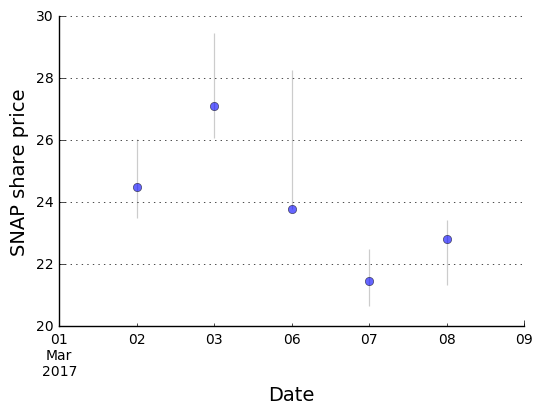

In [11]:
fig, ax = plt.subplots() #figsize=(8,5))

snap['Close'].plot(ax=ax, grid=True, style='o', alpha=.6)
ax.set_xlim([snap.index[0]-datetime.timedelta(days=1), snap.index[-1]+datetime.timedelta(days=1)])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.vlines(snap.index, snap['Low'], snap['High'], alpha=.2, lw=.9)
ax.set_ylabel('SNAP share price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.show()

In [57]:
start_w = datetime.datetime(2008, 6, 8)
oilwater = web.DataReader(['BP', 'AWK'], 'google', start_w, end)

In [13]:
oilwater.describe

<bound method NDFrame.describe of <class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 2203 (major_axis) x 2 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2008-06-09 00:00:00 to 2017-03-08 00:00:00
Minor_axis axis: AWK to BP>

In [14]:
type(oilwater[:,:,'AWK'])

pandas.core.frame.DataFrame

In [15]:
water = oilwater[:, :, 'AWK']
oil = oilwater[:, :, 'BP']

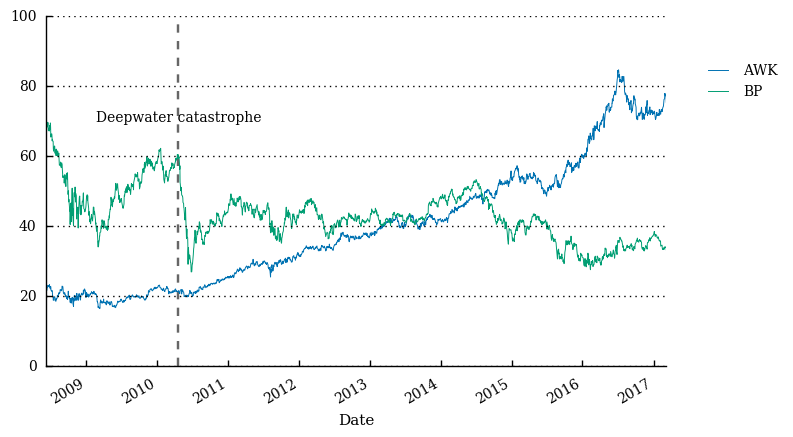

In [66]:
#import seaborn as sns
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('seaborn-notebook')
plt.rc('font', family='serif')

deepwater = datetime.datetime(2010, 4, 20)

fig, ax = plt.subplots(figsize=(8, 5))
water['Close'].plot(ax=ax, label='AWK', lw=.7) #grid=True,
oil['Close'].plot(ax=ax, label='BP', lw=.7) #grid=True, 
ax.yaxis.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.vlines(deepwater, 0, 100, linestyles='dashed', alpha=.6)
ax.text(deepwater, 70, 'Deepwater catastrophe', horizontalalignment='center')
ax.set_ylim([0, 100])
ax.legend(bbox_to_anchor=(1.2, .9), frameon=False)
plt.show()

In [18]:
print(plt.style.available)

['seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-poster', 'bmh', 'seaborn-muted', 'seaborn-pastel', 'seaborn-bright', 'seaborn-deep', 'fivethirtyeight', 'seaborn-dark', 'classic', 'grayscale', 'seaborn-paper', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-ticks', 'dark_background', 'seaborn-dark-palette', 'seaborn-notebook', 'ggplot', 'seaborn-talk']


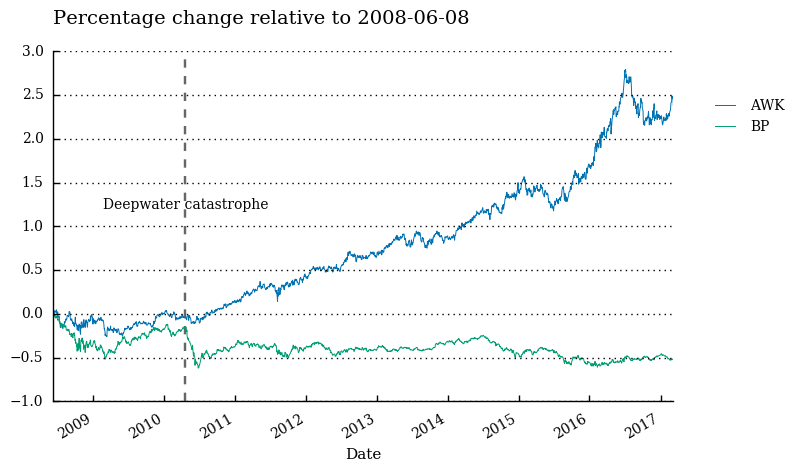

In [59]:
fig, ax = plt.subplots(figsize=(8, 5))
water['AWK_pct_ch'] = water['Close'].diff().cumsum()/water['Close'].iloc[0]
oil['BP_pct_ch'] = oil['Close'].diff().cumsum()/oil['Close'].iloc[0]
#water['Close'].pct_change().cumsum().plot(ax=ax, label='AWK')
water['AWK_pct_ch'].plot(ax=ax, label='AWK', lw=.7)
#oil['Close'].pct_change().cumsum().plot(ax=ax, label='BP')
oil['BP_pct_ch'].plot(ax=ax, label='BP', lw=.7)
ax.yaxis.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.vlines(deepwater, -1, 3, linestyles='dashed', alpha=.6)
ax.text(deepwater, 1.2, 'Deepwater catastrophe', horizontalalignment='center')
ax.set_ylim([-1, 3])
ax.legend(bbox_to_anchor=(1.2, .9), frameon=False)
ax.set_title('Percentage change relative to {:.10}\n'.format(str(start_w)), fontsize=14, loc='left')
plt.show()